# Decision Trees with drug200 dataset

# 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# 2. Load the drug dataset

In [2]:
df=pd.read_csv('drug200.csv')

# 3. Visualize the data and preprocessing

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
# It is clear that our dataset has many non numerical values so we need to encode them to numerical ones by LabelEncoder

In [6]:
features=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
X=features.values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [8]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[ :, 1]=le_sex.transform(X[ :, 1])


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [12]:
y=np.asarray(df['Drug'])
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

# 4.Train/Test split

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (140, 5) (140,)
Test set:  (60, 5) (60,)


# 5. Modeling the Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

drugtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
drugtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
yhat=drugtree.predict(X_test)
print(y_test[0:5])
print(yhat[0:5])

['drugY' 'drugY' 'drugY' 'drugY' 'drugC']
['drugY' 'drugY' 'drugY' 'drugY' 'drugC']


# 6. Evaluation

In [19]:
from sklearn import metrics
print("decisionTree accuracy: ", metrics.accuracy_score(y_test, yhat))

decisionTree accuracy:  0.9666666666666667


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[ 7,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0],
       [ 0,  0,  8,  0,  0],
       [ 0,  0,  0, 12,  1],
       [ 0,  0,  0,  0, 29]], dtype=int64)

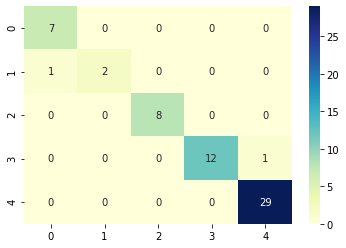

In [21]:
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, cmap="YlGnBu")
plt.show()